In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df=pd.read_csv('TeleCustomer.csv', encoding='latin-1')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Country Code
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,14
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,94


In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Country Code'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Country Code
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,137.869232
std,0.368612,24.559481,30.090047,77.312438
min,0.000000,0.000000,18.250000,1.000000
25%,0.000000,9.000000,35.500000,37.000000
50%,0.000000,29.000000,70.350000,166.000000
75%,0.000000,55.000000,89.850000,208.000000
max,1.000000,72.000000,118.750000,216.000000


## Data Analysis What All Things We Do
1. Missing values
2. Explore About the Numerical Variables
3. Explore About categorical Variables 
4. Finding Relationships between features


In [35]:
df.shape

(7043, 22)

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<Axes: >

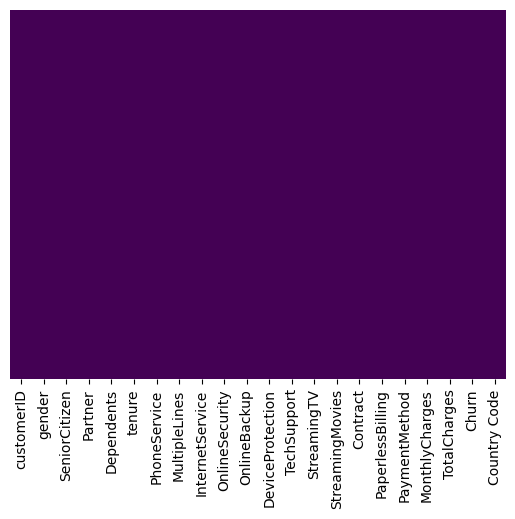

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [40]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Country Code'],
      dtype='object')

In [41]:
pd.merge(df,df_country,on='Country Code', how='left')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Country Code,Country
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,India
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,14,Australia
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30,Brazil
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37,Canada
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,94,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,37,Canada
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,94,Indonesia
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,148,New Zealand
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,162,Phillipines


In [42]:
final_df=pd.merge(df,df_country,on='Country Code', how='left')

In [43]:
final_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Country Code,Country
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,India
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,14,Australia


In [44]:
#To check Data Types
final_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
Country Code          int64
Country              object
dtype: object

In [45]:
final_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Country Code', 'Country'],
      dtype='object')

In [47]:
final_df.Country.value_counts()

India             470
Australia         470
Brazil            470
Canada            470
Indonesia         470
New Zealand       470
Phillipines       470
Qatar             470
Singapore         469
South Africa      469
Sri Lanka         469
Turkey            469
UAE               469
United Kingdom    469
United States     469
Name: Country, dtype: int64

In [49]:
country_names=final_df.Country.value_counts().index

In [51]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x29a22b4dbd0>,
 [Text(1.075914729195788, 0.22892683438066935, 'India'),
  Text(0.8895147413338622, 0.6471194054807446, 'Australia'),
  Text(0.5490081756099803, 0.953199886232369, 'Brazil'),
  Text(0.11338708594395423, 1.094140470296725, 'Canada'),
  Text(-0.3418780804041059, 1.0455234947810612, 'Indonesia'),
  Text(-0.7379135807681184, 0.8157717495218708, 'New Zealand'),
  Text(-1.0061070888572043, 0.44468924627348677, 'Phillipines'),
  Text(-1.0999946375037988, -0.0034347434964778316, 'Qatar'),
  Text(-1.0035114618940795, -0.45051608833337736, 'Singapore'),
  Text(-0.7339018728969828, -0.8193827194652697, 'South Africa'),
  Text(-0.33767788178641256, -1.0468876005341938, 'Sri Lanka'),
  Text(0.11680305713730646, -1.0937810776583123, 'Turkey'),
  Text(0.551132869881051, -0.9519729826716076, 'UAE'),
  Text(0.8903800000726728, -0.6459283671356968, 'United Kingdom'),
  Text(1.0760167696339427, -0.2284467366073218, 'United States')])

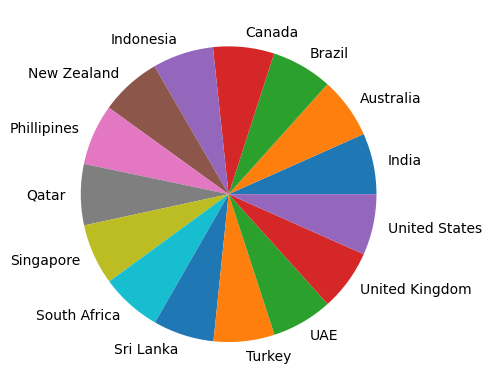

In [52]:
##Pie Chart
plt.pie(country_val,labels=country_names)

([<matplotlib.patches.Wedge at 0x29a22bd52d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'India'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Australia'),
  Text(0.5500001486524352, -0.9526278583383436, 'Brazil')])

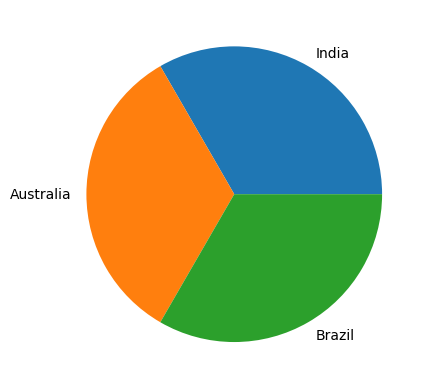

In [53]:
##Pie Chart- Top 3 countries 
plt.pie(country_val[:3],labels=country_names[:3])

([<matplotlib.patches.Wedge at 0x29a22c0e2d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'India'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Australia'),
  Text(0.5500001486524352, -0.9526278583383436, 'Brazil')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

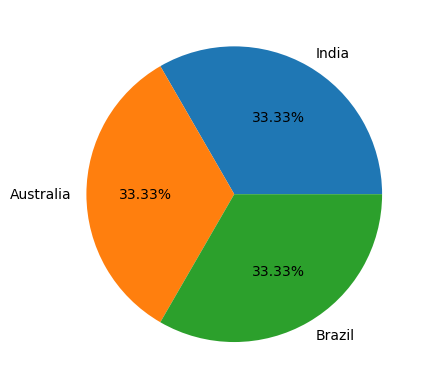

In [54]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation:Telecustomers maximum records are equal in India Australia and Brazil


In [59]:
final_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Country Code', 'Country'],
      dtype='object')

In [70]:
final_df.groupby(['gender','Country']).size().reset_index().rename(columns={0:'Customers By Gender Per Country'})

,gender,Country,Customers By Gender Per Country
0,Female,Australia,239
1,Female,Brazil,227
2,Female,Canada,235
3,Female,India,231
4,Female,Indonesia,230
5,Female,New Zealand,231
6,Female,Phillipines,242
7,Female,Qatar,214
8,Female,Singapore,231
9,Female,South Africa,223


In [69]:
Gendercount=final_df.groupby(['gender','Country']).size().reset_index().rename(columns={0:'Customers By Gender Per Country'})

In [71]:
Gendercount

,gender,Country,Customers By Gender Per Country
0,Female,Australia,239
1,Female,Brazil,227
2,Female,Canada,235
3,Female,India,231
4,Female,Indonesia,230
5,Female,New Zealand,231
6,Female,Phillipines,242
7,Female,Qatar,214
8,Female,Singapore,231
9,Female,South Africa,223
